## Emotion analysis and classification of short comments using machine learning techniques
+ Code developed by: Douglas Maia dos Santos
+ Github acess: https://github.com/m-dougl/emotion-analysis

##### Importing libraries for proper code functioning
###### OBS: Code depends on functions stored in emotion_analysis.py
+ Scikit-Learn or Sklearn: Library that provides the models used for classifications, as well as methods and metrics to evaluate them
+ Natural Language Toolkit or NLTK: Library used to perform some text pre-processing steps, such as the removal of stopwords and text tokenization
+ Pandas: Library used to organize and manipulate dataset working with objects in the DataFrame format that allows you to visualize changes in an organized way
+ Matplotlib and Seaborn: Libraries for graphical visualizations of data
+ Emotion_analysis: Python file where all useful functions have been organized to make the task of sorting comments easier

In [1]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from unicodedata import normalize
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords')
plt.style.use('seaborn')

C:\Users\ramon\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Dataset import and emotion analysis
+ Using pandas library stored in function "open_dataset" to read dataset
+ Pie chart plot to check the predominance of emotions

In [2]:
df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()

([<matplotlib.patches.Wedge at 0x1bd268a7c10>,
 [Text(0.2475542709556223, 1.0717821060885606, 'alegria'),
  Text(-1.0538944842551305, -0.31512920533745, 'surpresa'),
  Text(0.5442236121148721, -0.95593967383755, 'tristeza')],
 [Text(0.13502960233943032, 0.5846084215028512, '42.8%'),
  Text(-0.5748515368664348, -0.17188865745679088, '23.7%'),
  Text(0.29684924297174836, -0.5214216402750271, '33.5%')])

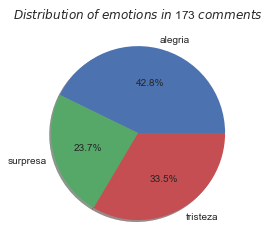

In [3]:
emotions = Counter(df.Emoção)
plt.figure(figsize=(9, 4))
plt.title(f'$Distribution $ $of$ $emotions$ $in$ {len(list(df.Emoção))} $comments$')
plt.pie(x=emotions.values(), labels=emotions.keys(),
        shadow=True, autopct='%1.1f%%')

##### Data pre-processing stage
+ 1 - Removal of special characters
+ 2 - Removal of accents contained in words
+ 3 - Text tokenization
+ 4 - Removel of stopwords contained in comments
+ 5 - Text untokenization
+ 6 - Reduction of the word to its root (Stemming)

In [4]:
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_characters)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_accents)
df.Comentarios = df.Comentarios.apply(emotion_analysis.tokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_stopwords)
df.Comentarios = df.Comentarios.apply(emotion_analysis.untokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.stemming)

##### Transformation of comments into a numerical matrix using TFIDF-Vectorizer or CountVectorizer methods
Check emotion_analysis file for more information about the parameters of this function

In [5]:
X, y = df.Comentarios, df.Emoção
X = emotion_analysis.vectorizer(X, 'tfidf')

##### Separation of the amout of training and test data
The variable X stores the numerical matrix and the variable y stores the emotions of the dataset. In this case, we choose the proportion of 80% data for training and 20% for testing our models, these values can be freely tested by user
+ If you choose to use the "simple_train" function, the models will be trained without parameter optimization of the GridSearchCV
+ If you choose to use the "cv_train" models will be trained taking cross-validation into account

In [6]:
train_size = .8
X_train, X_test, y_train, y_test = emotion_analysis.dataset_split(X, y, train_size)

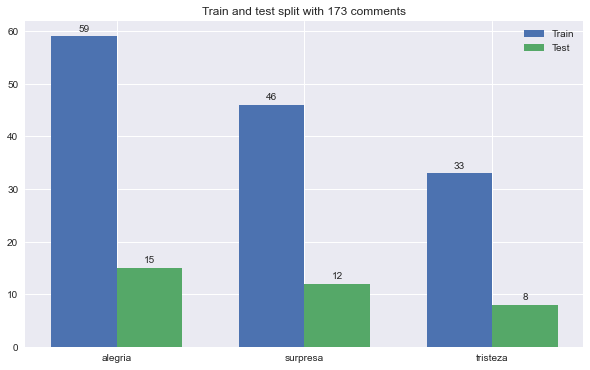

In [7]:
labels =  ['ALEGRIA', 'TRISTEZA', 'SURPRESA']
emotion_analysis.emotion_plot(y_train, y_test, emotions)

In [8]:
n_fold = 10
NB  = emotion_analysis.cv_train(classifier_name='NB',  X=X_train, y= y_train, n_fold=n_fold)
SVM = emotion_analysis.cv_train(classifier_name='SVM', X=X_train, y= y_train, n_fold=n_fold)
KNN = emotion_analysis.cv_train(classifier_name='KNN', X=X_train, y= y_train, n_fold=n_fold)

pred_nb  = NB.predict(X_test)   # Naive Bayes prediction
pred_svm = SVM.predict(X_test)  # SVM prediction
pred_knn = KNN.predict(X_test)  # KNN prediction

Naive Bayes best parameters: {'alpha': 1, 'fit_prior': False}
Naive Bayes best accuracy in 10 folds: 63.901098901098905
Support Vector Machine best parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine best accuracy in 10 folds: 65.32967032967034
K-Nearest Neighbors best parameters: {'algorithm': 'auto', 'n_neighbors': 6}
K-Nearest Neighbors best accuracy in 10 folds: 56.53846153846154


In [9]:
ADA = emotion_analysis.cv_train(classifier_name='ADA', X=X_train, y= y_train, n_fold=n_fold)
XGB = emotion_analysis.cv_train(classifier_name='XGB', X=X_train, y= y_train, n_fold=n_fold)
CAT = emotion_analysis.cv_train(classifier_name='CAT', X=X_train, y= y_train, n_fold=n_fold)

pred_ada = ADA.predict(X_test)  # ADA prediction
pred_xgb = XGB.predict(X_test)  # XGB prediction
pred_cat = CAT.predict(X_test)  # CAT prediction

Ada Boost Classifier best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 500}
Ada Boost Classifier best accuracy in 10 folds: 65.27472527472527
XG Boost Classifier best parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.03, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}
XG Boost Classifier best accuracy in 10 folds: 63.84615384615384
0:	learn: 1.0978446	total: 123ms	remaining: 492ms
1:	learn: 1.0971614	total: 135ms	remaining: 203ms
2:	learn: 1.0938853	total: 147ms	remaining: 98.1ms
3:	learn: 1.0911253	total: 160ms	remaining: 39.9ms
4:	learn: 1.0878258	total: 175ms	remaining: 0us
0:	learn: 1.0977821	total: 11.9ms	remaining: 47.6ms
1:	learn: 1.0951460	total: 23.1ms	remaining: 34.7ms
2:	learn: 1.0940948	total: 34.8ms	remaining: 23.2ms
3:	learn: 1.0911504	total: 45.6ms	remaining: 11.4ms
4:	learn: 1.0880920	total: 55.7ms	remaining: 0us
0:	learn: 1.0967551	total: 11.7ms	remaining: 46.8ms
1:	learn: 1.0943041	total: 20.5ms	remaining: 30.8ms
2:	lea

0:	learn: 1.0953287	total: 13.5ms	remaining: 54.2ms
1:	learn: 1.0850117	total: 25.8ms	remaining: 38.6ms
2:	learn: 1.0810405	total: 37.3ms	remaining: 24.8ms
3:	learn: 1.0700709	total: 49.2ms	remaining: 12.3ms
4:	learn: 1.0591631	total: 61.5ms	remaining: 0us
0:	learn: 1.0912591	total: 11ms	remaining: 44.1ms
1:	learn: 1.0817874	total: 20.2ms	remaining: 30.2ms
2:	learn: 1.0712343	total: 29.5ms	remaining: 19.6ms
3:	learn: 1.0625639	total: 38ms	remaining: 9.51ms
4:	learn: 1.0527382	total: 47.2ms	remaining: 0us
0:	learn: 1.0857851	total: 12.4ms	remaining: 49.7ms
1:	learn: 1.0761099	total: 25.3ms	remaining: 37.9ms
2:	learn: 1.0642362	total: 37.8ms	remaining: 25.2ms
3:	learn: 1.0588162	total: 51.5ms	remaining: 12.9ms
4:	learn: 1.0543461	total: 63.6ms	remaining: 0us
0:	learn: 1.0961892	total: 13.6ms	remaining: 54.3ms
1:	learn: 1.0812767	total: 28.2ms	remaining: 42.2ms
2:	learn: 1.0705197	total: 40.5ms	remaining: 27ms
3:	learn: 1.0606977	total: 52.5ms	remaining: 13.1ms
4:	learn: 1.0575721	total: 

0:	learn: 1.0951253	total: 24.9ms	remaining: 99.6ms
1:	learn: 1.0859092	total: 41.6ms	remaining: 62.4ms
2:	learn: 1.0797731	total: 62.3ms	remaining: 41.6ms
3:	learn: 1.0727847	total: 82ms	remaining: 20.5ms
4:	learn: 1.0649686	total: 103ms	remaining: 0us
0:	learn: 1.0905478	total: 39.8ms	remaining: 159ms
1:	learn: 1.0802121	total: 61.5ms	remaining: 92.3ms
2:	learn: 1.0725393	total: 74.4ms	remaining: 49.6ms
3:	learn: 1.0638812	total: 88.1ms	remaining: 22ms
4:	learn: 1.0563386	total: 104ms	remaining: 0us
0:	learn: 1.0883161	total: 40.8ms	remaining: 163ms
1:	learn: 1.0807049	total: 65.9ms	remaining: 98.9ms
2:	learn: 1.0753306	total: 84.1ms	remaining: 56ms
3:	learn: 1.0714156	total: 104ms	remaining: 25.9ms
4:	learn: 1.0637149	total: 124ms	remaining: 0us
0:	learn: 1.0900098	total: 46.8ms	remaining: 187ms
1:	learn: 1.0803913	total: 74.4ms	remaining: 112ms
2:	learn: 1.0715883	total: 94.5ms	remaining: 63ms
3:	learn: 1.0693230	total: 113ms	remaining: 28.4ms
4:	learn: 1.0663815	total: 133ms	remai

0:	learn: 1.0927884	total: 55.3ms	remaining: 221ms
1:	learn: 1.0880911	total: 87.2ms	remaining: 131ms
2:	learn: 1.0834889	total: 127ms	remaining: 84.8ms
3:	learn: 1.0765122	total: 157ms	remaining: 39.3ms
4:	learn: 1.0701190	total: 188ms	remaining: 0us
0:	learn: 1.0965778	total: 37.3ms	remaining: 149ms
1:	learn: 1.0896224	total: 70.7ms	remaining: 106ms
2:	learn: 1.0879822	total: 90.3ms	remaining: 60.2ms
3:	learn: 1.0827070	total: 118ms	remaining: 29.4ms
4:	learn: 1.0761453	total: 145ms	remaining: 0us
0:	learn: 1.0944127	total: 52.5ms	remaining: 210ms
1:	learn: 1.0916008	total: 84.2ms	remaining: 126ms
2:	learn: 1.0878117	total: 113ms	remaining: 75.1ms
3:	learn: 1.0833374	total: 140ms	remaining: 35ms
4:	learn: 1.0780922	total: 167ms	remaining: 0us
0:	learn: 1.0960310	total: 44.1ms	remaining: 176ms
1:	learn: 1.0939870	total: 73.2ms	remaining: 110ms
2:	learn: 1.0906973	total: 98.1ms	remaining: 65.4ms
3:	learn: 1.0833569	total: 125ms	remaining: 31.2ms
4:	learn: 1.0741604	total: 152ms	remaini

0:	learn: 1.0959552	total: 44.3ms	remaining: 177ms
1:	learn: 1.0934159	total: 89ms	remaining: 133ms
2:	learn: 1.0850635	total: 139ms	remaining: 92.7ms
3:	learn: 1.0802812	total: 186ms	remaining: 46.6ms
4:	learn: 1.0746119	total: 232ms	remaining: 0us
0:	learn: 1.0967229	total: 32.8ms	remaining: 131ms
1:	learn: 1.0878096	total: 77.4ms	remaining: 116ms
2:	learn: 1.0804566	total: 123ms	remaining: 82.3ms
3:	learn: 1.0736389	total: 166ms	remaining: 41.6ms
4:	learn: 1.0676531	total: 210ms	remaining: 0us
0:	learn: 1.0949857	total: 56.3ms	remaining: 225ms
1:	learn: 1.0930664	total: 86.5ms	remaining: 130ms
2:	learn: 1.0887140	total: 118ms	remaining: 78.8ms
3:	learn: 1.0814812	total: 131ms	remaining: 32.9ms
4:	learn: 1.0794520	total: 163ms	remaining: 0us
0:	learn: 1.0912814	total: 78.7ms	remaining: 315ms
1:	learn: 1.0887384	total: 122ms	remaining: 182ms
2:	learn: 1.0812316	total: 163ms	remaining: 109ms
3:	learn: 1.0788316	total: 206ms	remaining: 51.4ms
4:	learn: 1.0713100	total: 247ms	remaining: 

4:	learn: 1.0857287	total: 269ms	remaining: 0us
0:	learn: 1.0949603	total: 86.4ms	remaining: 345ms
1:	learn: 1.0914137	total: 142ms	remaining: 213ms
2:	learn: 1.0885325	total: 174ms	remaining: 116ms
3:	learn: 1.0849066	total: 237ms	remaining: 59.1ms
4:	learn: 1.0813932	total: 295ms	remaining: 0us
0:	learn: 1.0973837	total: 113ms	remaining: 451ms
1:	learn: 1.0950552	total: 187ms	remaining: 280ms
2:	learn: 1.0916842	total: 258ms	remaining: 172ms
3:	learn: 1.0878955	total: 328ms	remaining: 82.1ms
4:	learn: 1.0844362	total: 396ms	remaining: 0us
0:	learn: 1.0958986	total: 65ms	remaining: 260ms
1:	learn: 1.0924479	total: 117ms	remaining: 176ms
2:	learn: 1.0889160	total: 181ms	remaining: 121ms
3:	learn: 1.0855478	total: 246ms	remaining: 61.5ms
4:	learn: 1.0841718	total: 305ms	remaining: 0us
0:	learn: 1.0954385	total: 78.8ms	remaining: 315ms
1:	learn: 1.0911982	total: 149ms	remaining: 224ms
2:	learn: 1.0885304	total: 220ms	remaining: 147ms
3:	learn: 1.0858205	total: 313ms	remaining: 78.2ms
4:	

4:	learn: 1.0408989	total: 322ms	remaining: 0us
0:	learn: 1.0860421	total: 125ms	remaining: 499ms
1:	learn: 1.0697750	total: 226ms	remaining: 338ms
2:	learn: 1.0601252	total: 315ms	remaining: 210ms
3:	learn: 1.0506312	total: 409ms	remaining: 102ms
4:	learn: 1.0399333	total: 495ms	remaining: 0us
0:	learn: 1.0863989	total: 86ms	remaining: 344ms
1:	learn: 1.0743230	total: 155ms	remaining: 232ms
2:	learn: 1.0677174	total: 220ms	remaining: 147ms
3:	learn: 1.0554082	total: 249ms	remaining: 62.2ms
4:	learn: 1.0477600	total: 333ms	remaining: 0us
0:	learn: 1.0945715	total: 34.2ms	remaining: 137ms
1:	learn: 1.0812356	total: 94.3ms	remaining: 141ms
2:	learn: 1.0704320	total: 165ms	remaining: 110ms
3:	learn: 1.0561810	total: 235ms	remaining: 58.7ms
4:	learn: 1.0478634	total: 309ms	remaining: 0us
0:	learn: 1.0899583	total: 94.5ms	remaining: 378ms
1:	learn: 1.0806425	total: 192ms	remaining: 288ms
2:	learn: 1.0713241	total: 294ms	remaining: 196ms
3:	learn: 1.0610088	total: 391ms	remaining: 97.7ms
4:	

0:	learn: 1.0908526	total: 192ms	remaining: 767ms
1:	learn: 1.0800922	total: 377ms	remaining: 565ms
2:	learn: 1.0690446	total: 600ms	remaining: 400ms
3:	learn: 1.0643890	total: 658ms	remaining: 165ms
4:	learn: 1.0578962	total: 883ms	remaining: 0us
0:	learn: 1.0924524	total: 216ms	remaining: 863ms
1:	learn: 1.0857458	total: 231ms	remaining: 347ms
2:	learn: 1.0738957	total: 434ms	remaining: 290ms
3:	learn: 1.0665417	total: 669ms	remaining: 167ms
4:	learn: 1.0572741	total: 862ms	remaining: 0us
0:	learn: 1.0948608	total: 15.8ms	remaining: 63.3ms
1:	learn: 1.0774133	total: 214ms	remaining: 321ms
2:	learn: 1.0642941	total: 408ms	remaining: 272ms
3:	learn: 1.0479739	total: 598ms	remaining: 150ms
4:	learn: 1.0434964	total: 787ms	remaining: 0us
0:	learn: 1.0854374	total: 192ms	remaining: 767ms
1:	learn: 1.0707956	total: 391ms	remaining: 586ms
2:	learn: 1.0577675	total: 420ms	remaining: 280ms
3:	learn: 1.0535510	total: 646ms	remaining: 161ms
4:	learn: 1.0405019	total: 839ms	remaining: 0us
0:	lea

##### Evaluating the models
+ Confusion Matrix
+ Accuracy
+ Precision
+ Recall 
+ F1-Score
+ AUC Score

+ Confusion Matrix

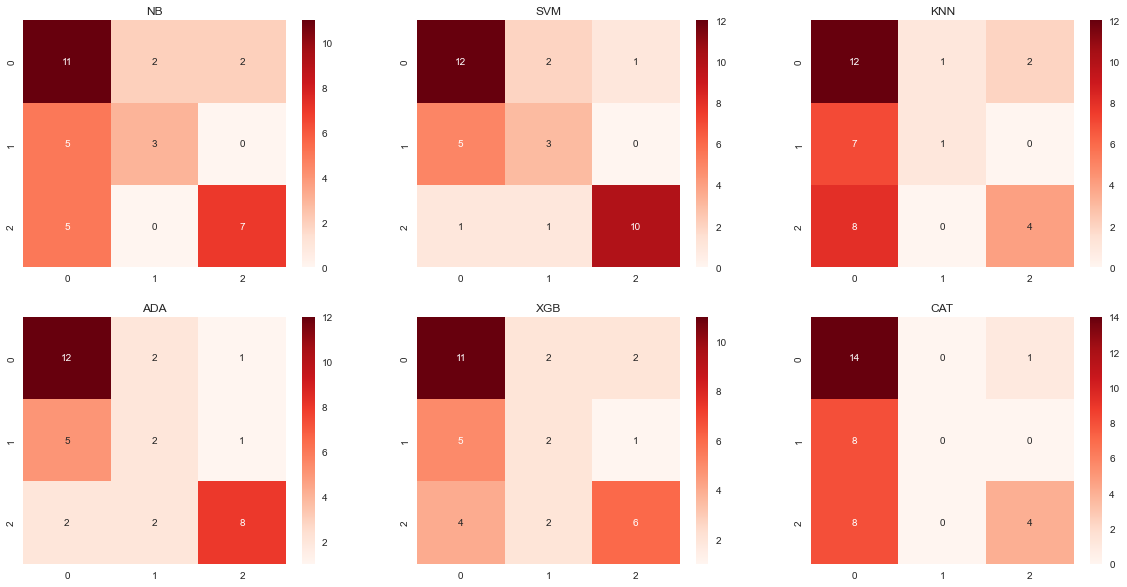

In [10]:
list_predict = [pred_nb, pred_svm, pred_knn, pred_ada,pred_xgb, pred_cat]
models_names = ['NB', 'SVM', 'KNN', 'ADA','XGB', 'CAT']
'''OBS:
        0 = ALEGRIA
        1 = SURPRESA
        2 = TRISTEZA
'''
emotion_analysis.confusion_matrix_plot(list_predict = list_predict,
                                  models_names = models_names, 
                                  y_true       = y_test)

+ Accuracy, Precision, Recall and F1-Score

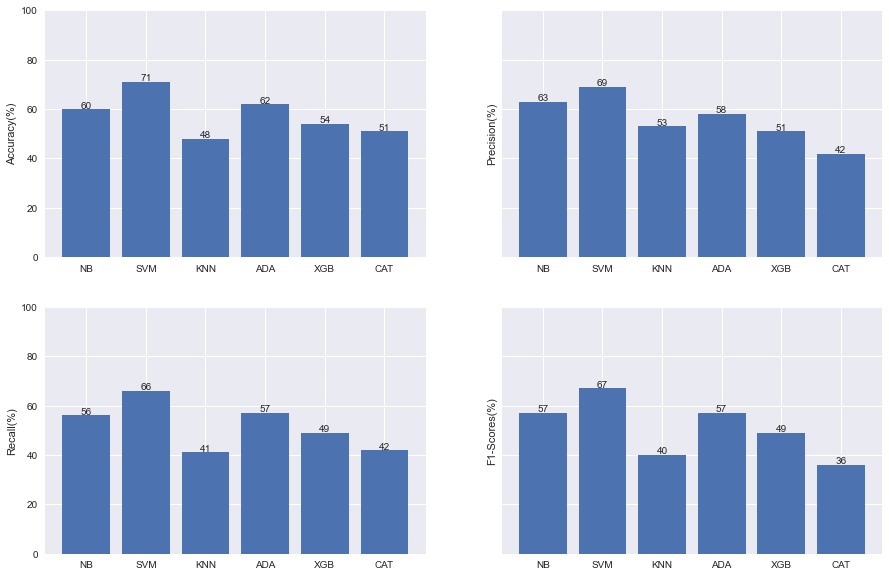

In [11]:
emotion_analysis.metrics_evaluation(models_names=models_names,
                   list_predict=list_predict,
                   y_true = y_test)